In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
file_path =  "/content/Titanic_Dataset.csv"

titanic_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of columns:

### 1. PassengerId: Unique identifier for each passenger.
### 2. Survived: Survival status (0 = No, 1 = Yes).
### 3. Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
### 4. Name: Name of the passenger.
### 5. Sex: Gender of the passenger.
### 6. Age: Age of the passenger.
### 7. SibSp: Number of siblings/spouses aboard the Titanic.
### 8. Parch: Number of parents/children aboard the Titanic.
### 9. Ticket: Ticket number.
### 10. Fare: Passenger fare.
### 11. Cabin: Cabin number.
### 12. Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

In [7]:
# Check for missing values
missing_values = titanic_df.isnull().sum()

missing_values

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Handling Missing Values

In [8]:
# Fill missing values

# Impute missing Age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Impute the single missing Fare value with the median fare
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

# Fill missing Cabin values with a placeholder
titanic_df['Cabin'].fillna('Unknown', inplace=True)

# Impute missing Embarked values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after_cleaning = titanic_df.isnull().sum()

missing_values_after_cleaning

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# Descriptive statistics
descriptive_stats = titanic_df.describe(include='all')

descriptive_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309,1309
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,187,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,Unknown,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,1014,916
mean,655.000000,0.377387,2.294882,NaN,NaN,29.503186,0.498854,0.385027,NaN,33.281086,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,12.905241,1.041658,0.865560,NaN,51.741500,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


## Exploratory Data Analysis :

### Survival Rate

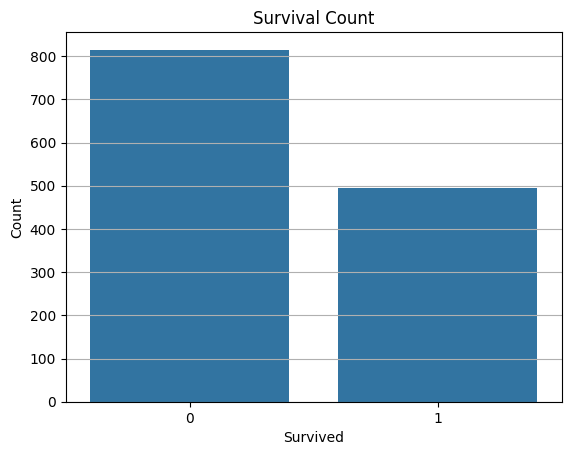

In [14]:
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.grid(axis ='y')
plt.show()

### Survival by Passenger Class

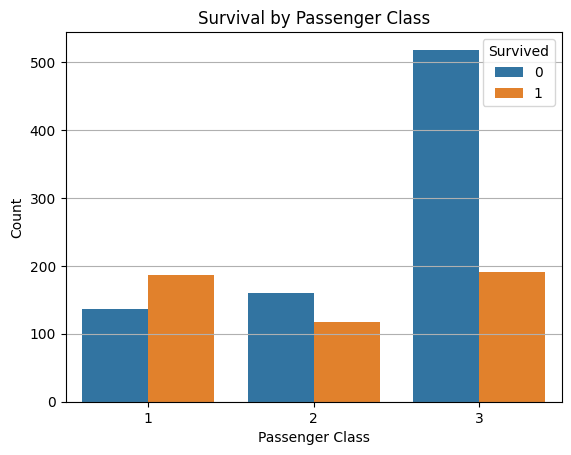

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.grid(axis ='y')
plt.show()

### Survival by Gender

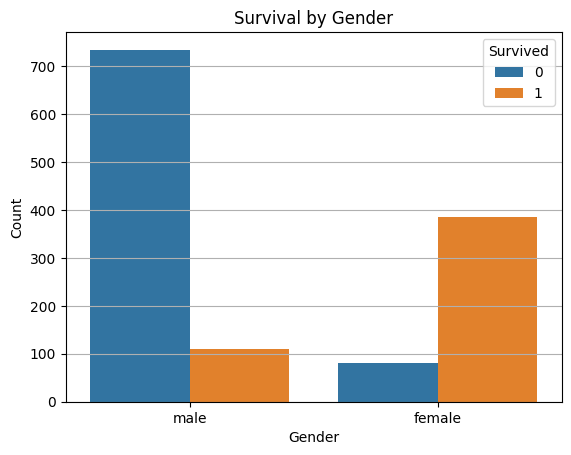

In [18]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis ='y')
plt.show()

### Age Distribution

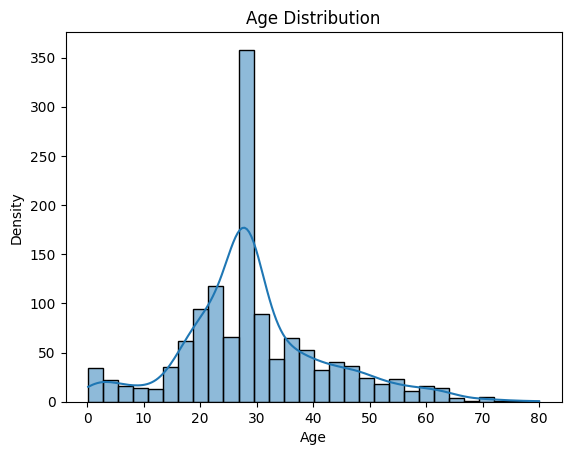

In [19]:
sns.histplot(titanic_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### Survival by Age

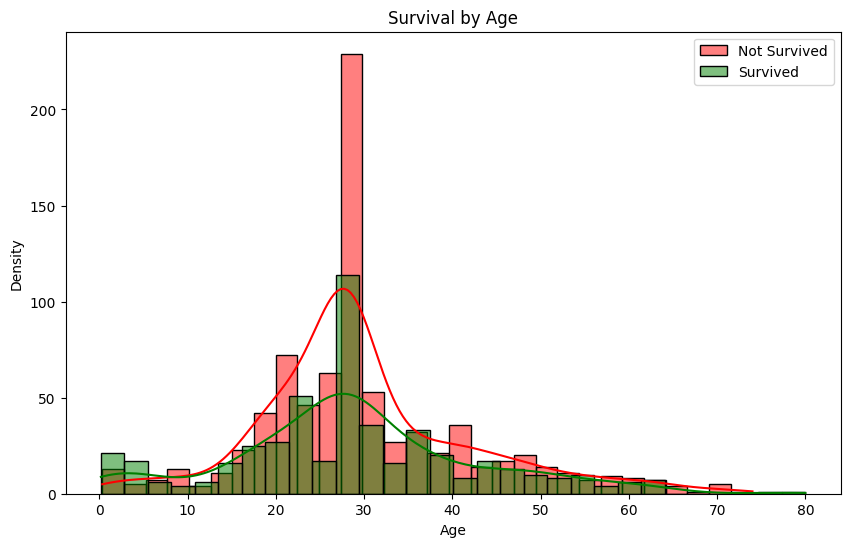

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True, bins=30)
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True, bins=30)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Fare Distribution

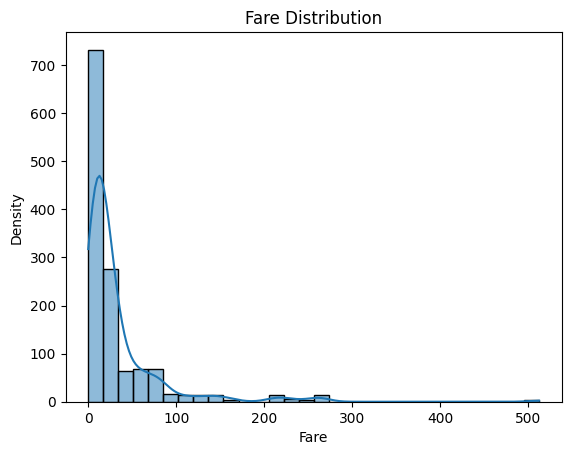

In [21]:
sns.histplot(titanic_df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

### Survival by Fare

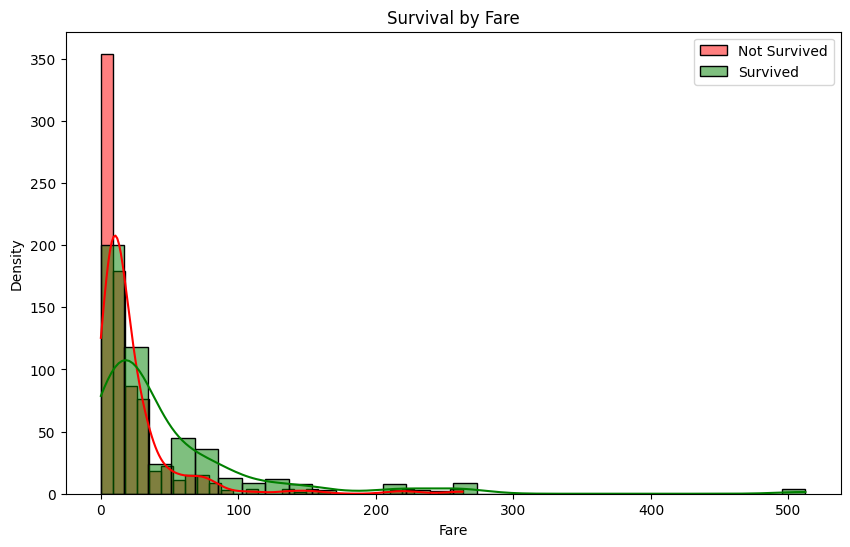

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Fare'], color='red', label='Not Survived', kde=True, bins=30)
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Fare'], color='green', label='Survived', kde=True, bins=30)
plt.title('Survival by Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

### Survival by Siblings/Spouses Aboard (SibSp)

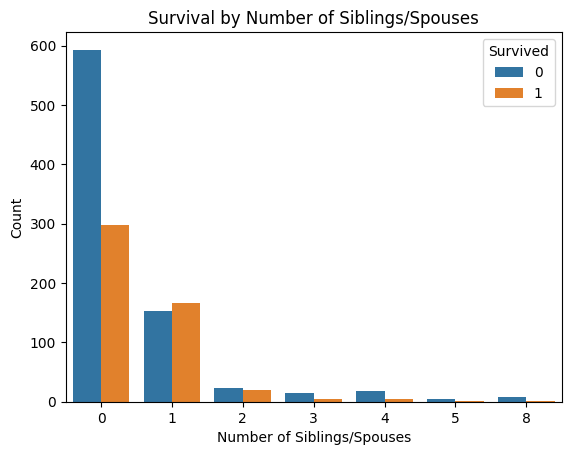

In [23]:
sns.countplot(x='SibSp', hue='Survived', data=titanic_df)
plt.title('Survival by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

 ### Survival by Parents/Children Aboard (Parch)

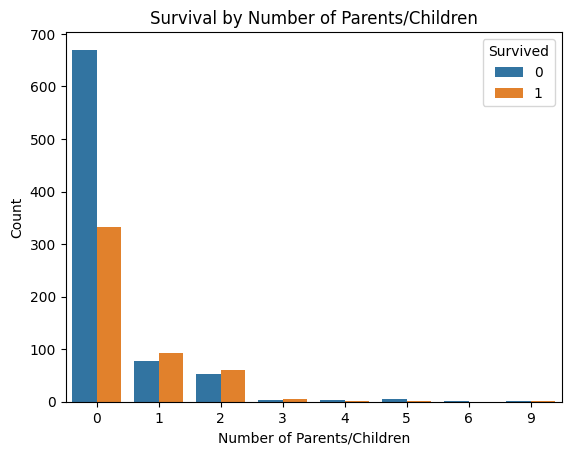

In [24]:
sns.countplot(x='Parch', hue='Survived', data=titanic_df)
plt.title('Survival by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

### Survival by Port of Embarkation

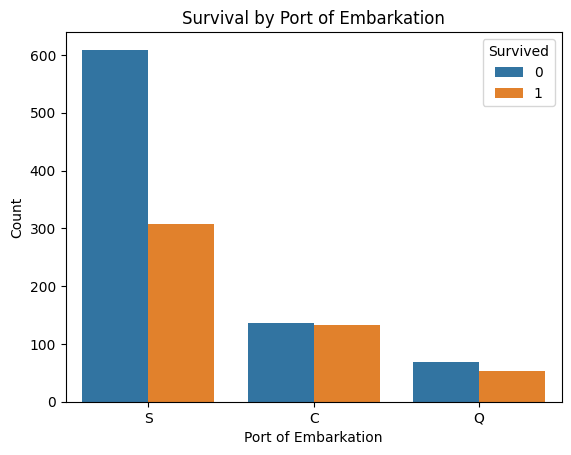

In [25]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

##  Exploratory Data Analysis (EDA) Insights :

### 1. Survival Rate :
#### -> Approximately 38% of the passengers survived.

### 2. Survival by Passenger Class :
#### -> Passengers in 1st class had a higher survival rate compared to those in 2nd and 3rd classes.

### 3. Survival by Gender :
#### -> Females had a significantly higher survival rate compared to males.

### 4. Age Distribution :

#### -> The age distribution is roughly normal with most passengers between 20 and 40 years old.
#### -> Children (younger age groups) had a higher survival rate compared to other age groups.

### 5. Survival by Age :
#### -> Younger passengers had a higher likelihood of survival compared to older passengers.

### 6. Fare Distribution :
#### -> The fare distribution is right-skewed, with most passengers paying a fare below $100.

### 7. Survival by Fare :
#### -> Passengers who paid higher fares had a higher survival rate.

### 8. Survival by Siblings/Spouses Aboard (SibSp) :
#### -> Passengers with 1-2 siblings/spouses aboard had higher survival rates than those with none or more than 2.

### 9. Survival by Parents/Children Aboard (Parch) :
#### ->Passengers with 1-3 parents/children aboard had higher survival rates than those with none or more than 3.

### 10. Survival by Port of Embarkation :
#### -> Passengers who embarked from Cherbourg (C) had a higher survival rate compared to those who embarked from Queenstown (Q) and Southampton (S).